# 1. Credit Card Fraud Detection
<b> Problem Statement </b> : Given a set of features we have to determine whether the transaction is fraud or not. </br>
<b> Data : </b> From tensorflow

<b> Objective : </b> Use soft weighted f1 as loss function




## 1.1 Loading Data & Viewing Data

In [0]:
%matplotlib inline
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv') ## Thanks to TF examples
raw_df.head()
print(f'The dataset has {raw_df.shape[0]} rows and {raw_df.shape[1]} columns')
print('The columns of the dataset : ', raw_df.columns)
print('\n The dataset description : \n')
display(raw_df.describe())

The dataset has 284807 rows and 31 columns
The columns of the dataset :  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

 The dataset description : 



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [0]:
print('More information about the data : \n\n')
display(raw_df.info())

More information about the data : 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284

None

- To conclude all the columns are numeric columns.
- There are no null rows in the data

In [0]:
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1.2 Data Analysis

###1.2.1 Class Analysis

The percentage of positive class is :  0.17
The percentage of negative class is :  99.83


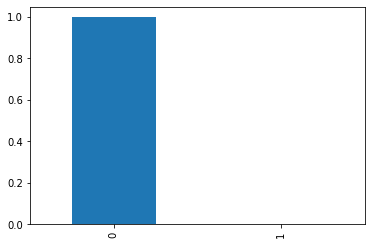

In [0]:
raw_df.Class.value_counts(normalize= True).plot(kind = 'bar')
print('The percentage of positive class is : ', round((len(raw_df[raw_df.Class == 1])/ len(raw_df)) * 100, 2))
print('The percentage of negative class is : ', round((len(raw_df[raw_df.Class == 0])/ len(raw_df)) * 100, 2))

> A perfectly imbalanced dataset and let us take the metric as f1 score since precision and recall is more important.

###1.2.2 Feature Analysis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


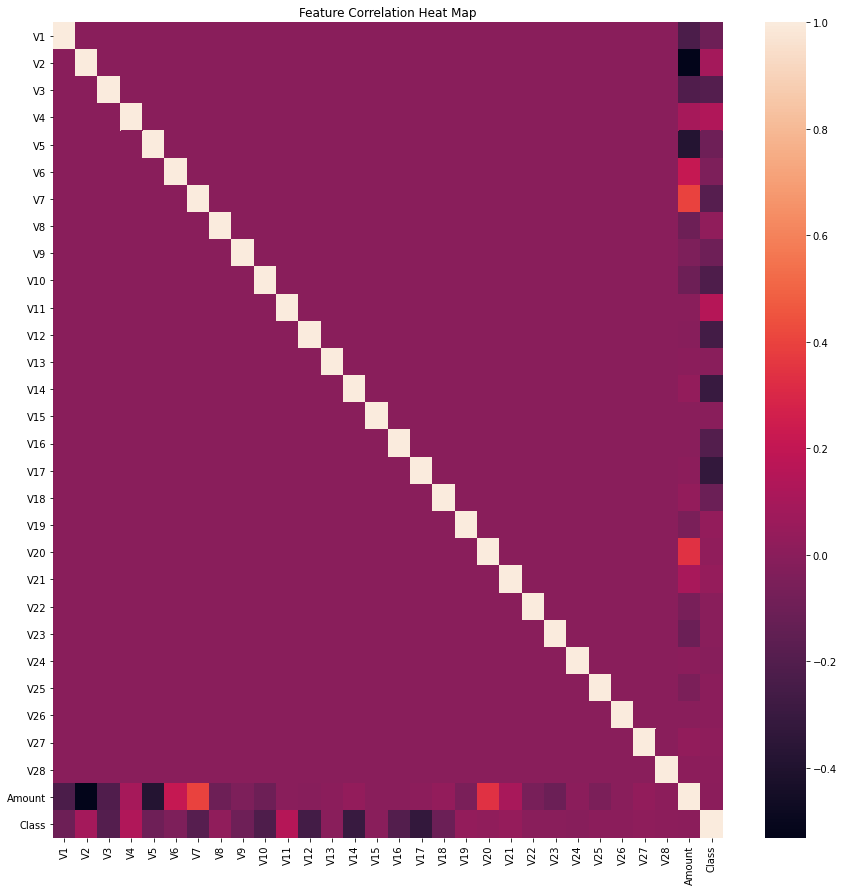

In [0]:
import seaborn as sns
plt.figure(figsize= (15,15))
sns.heatmap(raw_df.iloc[:,1:].corr())
plt.title('Feature Correlation Heat Map')
plt.show()


- All these features are independent from the intro we can conclude that these features are a result of some dimension reduction techniques like PCA or SVD or etc.

##1.3 Preprocessing Data

In [0]:
raw_df = raw_df.iloc[:, 1:] # Removing the time column for our analysis
data = raw_df.iloc[:,:-1]
labels = raw_df.iloc[:,-1]
print('Shape of data', data.shape)
print('Shape of label', labels.shape)

Shape of data (284807, 29)
Shape of label (284807,)


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, stratify = labels, test_size = 0.3, random_state = 10)
print('The shape of the X_train is : ', X_train.shape)
print('The shape of the X_test is : ', X_test.shape)

The shape of the X_train is :  (199364, 29)
The shape of the X_test is :  (85443, 29)


In [0]:
# Standardizing data for better scaling
standardizer = StandardScaler().fit(X_train)
X_train = standardizer.transform(X_train)
X_test = standardizer.transform(X_test)
print('The shape of the X_train is : ', X_train.shape)
print('The shape of the X_test is : ', X_test.shape)

The shape of the X_train is :  (199364, 29)
The shape of the X_test is :  (85443, 29)


## 1.4 Building Models

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, TerminateOnNaN
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, Precision, Recall

In [0]:
import tensorflow as tf

def weighted_f1_loss(true, predicted):
  """Ideas from 
  1. https://towardsdatascience.com/the-unknown-benefits-of-using-a-soft-f1-loss-in-classification-systems-753902c0105d
  2. https://stackoverflow.com/questions/59963911/how-to-write-a-custom-f1-loss-function-with-weighted-average-for-keras
  """
  y = tf.cast(true, tf.float32)
  y_hat = tf.cast(predicted, tf.float32)
  true_positives = tf.reduce_sum(y * y_hat, axis = 0)
  true_negatives = tf.reduce_sum((1 - y) * (1 - y_hat), axis = 0)
  false_positives = tf.reduce_sum((1 - y) * y_hat , axis = 0)
  false_negatives = tf.reduce_sum(y * (1 - y_hat), axis = 0)
  f1 = 2 *(true_positives) / (2 * true_positives + false_positives + false_negatives + 1e-15)
  return tf.reduce_mean(1 - (tf.reduce_sum(y, axis = 0) * f1))

In [0]:
METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      Precision(name='precision'),
      Recall(name='recall'),
]

model = Sequential()
model.add(Dense(29, activation= 'relu', input_shape = (29, )))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(5, activation= 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()
model.compile(loss = weighted_f1_loss, optimizer = 'adam', metrics = METRICS)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 29)                870       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29)                0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 29)                116       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 150       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 1,142
Trainable params: 1,084
Non-trainable params: 58
_________________________________________________________________


In [0]:
model.fit(X_train, Y_train, batch_size= 256, epochs = 10, validation_data= (X_test, Y_test))

Epoch 1/10
779/779 [==============================] - 7s 9ms/step - loss: 0.9768 - tp: 314.0000 - fp: 62808.0000 - tn: 136212.0000 - fn: 30.0000 - precision: 0.0050 - recall: 0.9128 - val_loss: 0.7706 - val_tp: 119.0000 - val_fp: 22.0000 - val_tn: 85273.0000 - val_fn: 29.0000 - val_precision: 0.8440 - val_recall: 0.8041
Epoch 2/10
779/779 [==============================] - 7s 8ms/step - loss: 0.6599 - tp: 276.0000 - fp: 131.0000 - tn: 198889.0000 - fn: 68.0000 - precision: 0.6781 - recall: 0.8023 - val_loss: 0.6414 - val_tp: 119.0000 - val_fp: 22.0000 - val_tn: 85273.0000 - val_fn: 29.0000 - val_precision: 0.8440 - val_recall: 0.8041
Epoch 3/10
779/779 [==============================] - 7s 8ms/step - loss: 0.6417 - tp: 282.0000 - fp: 131.0000 - tn: 198889.0000 - fn: 62.0000 - precision: 0.6828 - recall: 0.8198 - val_loss: 0.6400 - val_tp: 121.0000 - val_fp: 35.0000 - val_tn: 85260.0000 - val_fn: 27.0000 - val_precision: 0.7756 - val_recall: 0.8176
Epoch 4/10
779/779 [==================

##1.5 Conclusion

- The objective of using a soft weighted f1 loss function is completed

<b> Future works include </b>

- Better sampling techniques for rich dataset
- Writing custom function to include k-fold cv using the NNs with different architectures